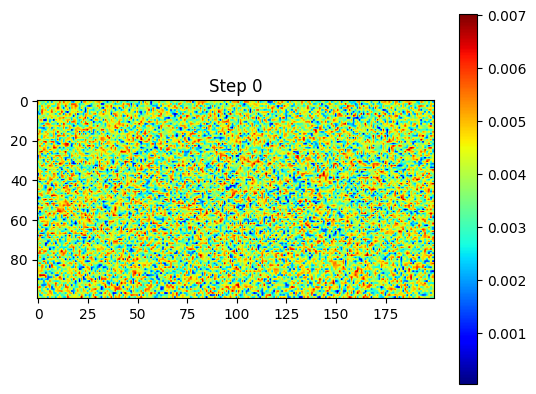

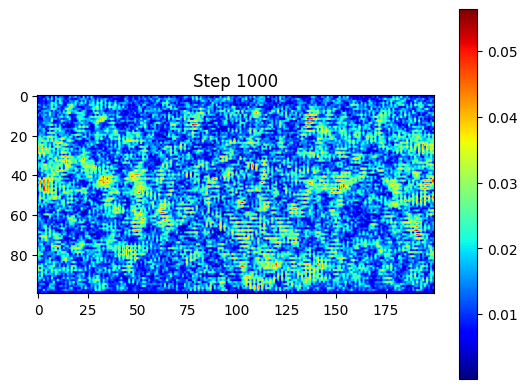

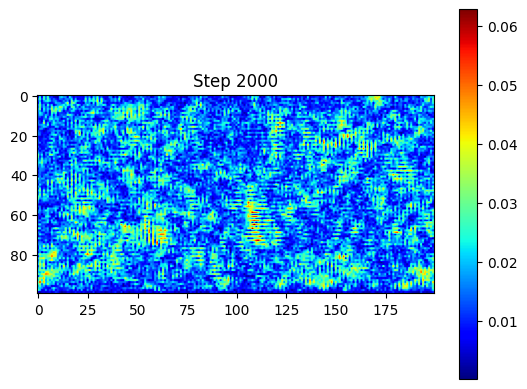

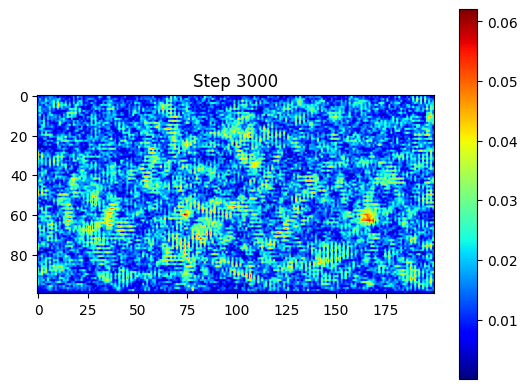

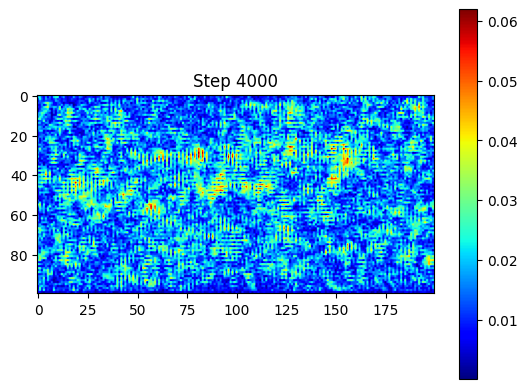

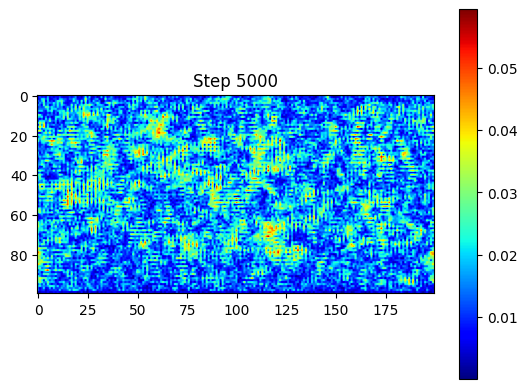

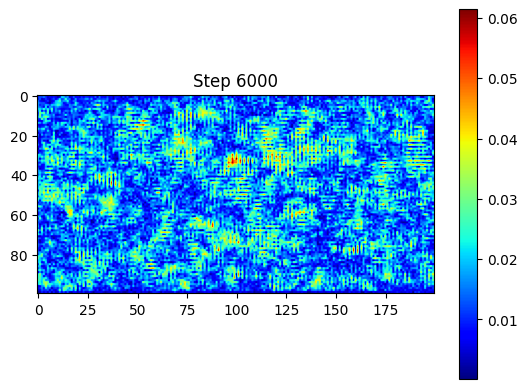

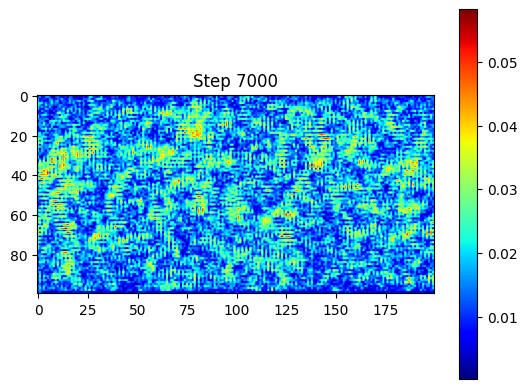

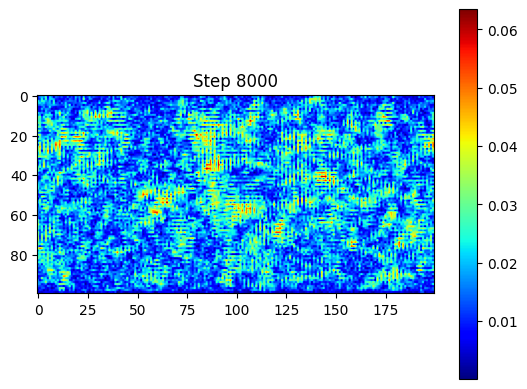

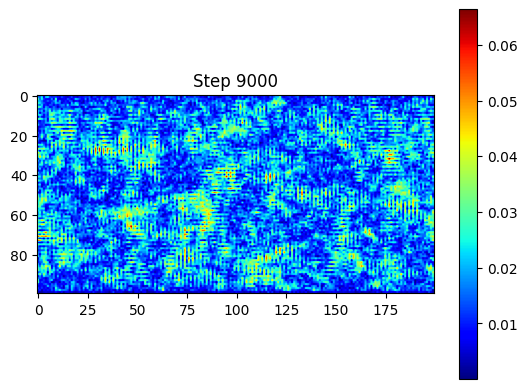

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
nx, ny = 200, 100  # Grid size
tau = 0.6  # Relaxation time
rho0 = 1.0  # Initial density
active_force = 0.01  # Active force magnitude
num_steps = 10000  # Number of simulation steps

# Lattice velocities and weights for D2Q9 model
c = np.array([[0, 0], [1, 0], [0, 1], [-1, 0], [0, -1], [1, 1], [-1, 1], [-1, -1], [1, -1]])
w = np.array([4/9] + [1/9]*4 + [1/36]*4)

# Initialize density and velocity fields
rho = np.ones((nx, ny)) * rho0
u = np.zeros((nx, ny, 2))

# Initialize distribution function
f = np.zeros((nx, ny, 9))
for i in range(9):
    cu = c[i, 0] * u[:, :, 0] + c[i, 1] * u[:, :, 1]
    f[:, :, i] = w[i] * rho * (1 + 3*cu + 9/2*cu**2 - 3/2*(u[:, :, 0]**2 + u[:, :, 1]**2))

def equilibrium(rho, u):
    feq = np.zeros((nx, ny, 9))
    for i in range(9):
        cu = c[i, 0] * u[:, :, 0] + c[i, 1] * u[:, :, 1]
        feq[:, :, i] = w[i] * rho * (1 + 3*cu + 9/2*cu**2 - 3/2*(u[:, :, 0]**2 + u[:, :, 1]**2))
    return feq

def streaming(f):
    for i in range(9):
        f[:, :, i] = np.roll(np.roll(f[:, :, i], c[i, 0], axis=0), c[i, 1], axis=1)
    return f

def apply_boundary_conditions(f):
    # Bounce-back boundary conditions for top and bottom walls
    f[:, 0, [2, 5, 6]] = f[:, 0, [4, 7, 8]]
    f[:, -1, [4, 7, 8]] = f[:, -1, [2, 5, 6]]
    return f

for step in range(num_steps):
    # Compute macroscopic variables
    rho = np.sum(f, axis=2)
    u = np.zeros((nx, ny, 2))
    for i in range(9):
        u[:, :, 0] += f[:, :, i] * c[i, 0]
        u[:, :, 1] += f[:, :, i] * c[i, 1]

    u /= rho[:, :, np.newaxis]

    # Apply active force
    u[:, :, 0] += active_force * (np.random.rand(nx, ny) - 0.5)
    u[:, :, 1] += active_force * (np.random.rand(nx, ny) - 0.5)

    # Collision step
    feq = equilibrium(rho, u)
    f += -(f - feq) / tau

    # Streaming step
    f = streaming(f)

    # Apply boundary conditions
    f = apply_boundary_conditions(f)

    # Visualization every 1000 steps
    if step % 1000 == 0:
        plt.imshow(np.sqrt(u[:, :, 0]**2 + u[:, :, 1]**2).T, cmap='jet')
        plt.colorbar()
        plt.title(f'Step {step}')
        plt.show()